# PART 2 - HETEROSKEDASTICITY

### Import libraries

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import f
from scipy import stats

### Fetch Data

In [65]:
df = pd.read_csv('../data/HPRICE2_processed.csv')

In [66]:
print(df.shape)
df.head()

(506, 13)


,price,crime,nox,rooms,dist,radial,proptax,stratio,lowstat,lprice,lnox,lproptax,nox_category
0,24000,0.006,5.38,6.57,4.09,1,29.6,15.3,4.98,10.085810,1.682688,5.690360,Medium
1,21599,0.027,4.69,6.42,4.97,2,24.2,17.8,9.14,9.980402,1.545433,5.488938,Medium
2,34700,0.027,4.69,7.18,4.97,2,24.2,17.8,4.03,10.454500,1.545433,5.488938,Medium
3,33400,0.032,4.58,7.00,6.06,3,22.2,18.7,2.94,10.416310,1.521699,5.402678,Medium
4,36199,0.069,4.58,7.15,6.06,3,22.2,18.7,5.33,10.496790,1.521699,5.402678,Medium


### 18. Explain the problem of heteroskedasticity with an example from the course.

*Heteroskedasticity* occurs when the variance of the error term $u_{t}$ in a regression model is not constant across all observations. In other words, the spread of the residuals changes depending on the level of the independent variables.

The example on slide 29 (french version) discusses a situation where a regression model is estimated to study the impact of income and price on a dependent variable $\hat{\text{cigs}}$. Initially, the results suggest no significant effect of income and price. However, this might be due to heteroskedasticity in the data. 

Let's define the simplified model: $\hat{\text{cigs}} = \beta_0 + \beta_1 \cdot \text{log(income)} + \beta_2 \cdot \text{log(price)}_t + u_t$

Without correcting for heteroskedasticity, the coefficients $\beta_1$ (income) and $\beta_2$ (price) appear insignificant. This happens because the standard errors are misestimated under heteroskedasticity.

After applying GLS (Generalized Least Squares), income and price are found to have a significant effect on the dependent variable, as GLS provides efficient coefficient estimates. This shows the importance of addressing heteroskedasticity.

### 19. In the specification of question 9, test the hypothesis of no heteroskedasticity of linear form, i.e., in the regression of $u^2$ on `constant`, `crime`, `nox`, `rooms`, `proptax`, test $H_0: \delta_{crime}, \delta_{nox}, \delta_{rooms}, \delta_{proptax} = 0$, where the coefficients $\delta_k$ ($k =$ `crime`, `nox`, `rooms`, `proptax`) are associated with the corresponding explanatory variables.


In Question 9, we estimated the following model:
$$
price = \beta_0 + \beta_1 \cdot crime + \beta_2 \cdot nox + \beta_3 \cdot rooms + \beta_4 \cdot proptax + u
$$

Now our goal is to test the hypothesis of no heteroskedasticity of linear form. 
We will regress the squared residuals $u^2$ from the previous model, on the explanatory variables:
$$
u^2 = \delta_0 + \delta_{crime} \cdot crime + \delta_{nox} \cdot nox + \delta_{rooms} \cdot rooms + \delta_{proptax} \cdot proptax + v
$$

And test the hypothesis 
$$H_0: \delta_{crime} = \delta_{nox} = \delta_{rooms} = \delta_{proptax} = 0$$

In [67]:
X9 = df[['crime', 'nox', 'rooms', 'proptax']]  # Independent variables
X9 = sm.add_constant(X9)  # Add a constant term to the model
y9 = df['price']  # Dependent variable
X9.head()

,const,crime,nox,rooms,proptax
0,1.0,0.006,5.38,6.57,29.6
1,1.0,0.027,4.69,6.42,24.2
2,1.0,0.027,4.69,7.18,24.2
3,1.0,0.032,4.58,7.00,22.2
4,1.0,0.069,4.58,7.15,22.2


In [68]:
# Create the model
model9 = sm.OLS(y9, X9).fit()

# Analyze model
print(model9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     169.6
Date:                Sat, 07 Dec 2024   Prob (F-statistic):           1.06e-91
Time:                        13:37:26   Log-Likelihood:                -5119.6
No. Observations:                 506   AIC:                         1.025e+04
Df Residuals:                     501   BIC:                         1.027e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.868e+04   3215.205     -5.811      0.0

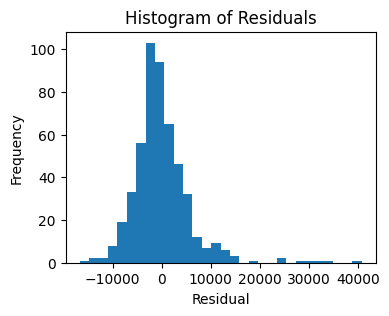

In [69]:

# Get residuals from the model
residuals9 = model9.resid

# Plot histogram
plt.figure(figsize=(4, 3))
plt.hist(residuals9, bins=30)
plt.title('Histogram of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

#### Implementation

In [70]:

# Step 1: Compute squared residuals from the original regression
residuals_squared19 = residuals9 ** 2

# Step 2: Prepare the data for the auxiliary regression
X19 = df[['crime', 'nox', 'rooms', 'proptax']]  # Explanatory variables
X19 = sm.add_constant(X19)  # Add constant term

# Step 3: Run the auxiliary regression
aux_model19 = sm.OLS(residuals_squared19, X19).fit()

# Print the results
print("Auxiliary Regression Summary:")
print(aux_model19.summary())


Auxiliary Regression Summary:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     6.799
Date:                Sat, 07 Dec 2024   Prob (F-statistic):           2.47e-05
Time:                        13:37:27   Log-Likelihood:                -10130.
No. Observations:                 506   AIC:                         2.027e+04
Df Residuals:                     501   BIC:                         2.029e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.885e+07 

In [71]:
# Step 1: Compute SSR for the unrestricted model (auxiliary regression with all predictors)
SSR_UR19 = aux_model19.ssr

# Step 2: Compute SSR for the restricted model (auxiliary regression with only the constant)
X_restricted19 = sm.add_constant(np.ones_like(df['crime']))  # Only the constant
restricted_model19 = sm.OLS(residuals_squared19, X_restricted19).fit()
SSR_R19 = restricted_model19.ssr

# Step 3: Compute the number of restrictions (q), number of observations (n), and number of parameters (k)
q19 = X19.shape[1] - 1  # Number of predictors (excluding constant)
print("Number of restrictions (q):", q19)
n19 = len(residuals_squared19)  # Number of observations
print("Number of observations (n):", n19)
k19 = X19.shape[1]  # Total parameters in unrestricted model (including constant)
print("Number of parameters (k):", k19)

Number of restrictions (q): 4
Number of observations (n): 506
Number of parameters (k): 5


In [72]:

# Step 4: Compute the F-statistic using the formula
F_stat19 = ((SSR_R19 - SSR_UR19) / q19) / (SSR_UR19 / (n19 - k19))

# Step 5: Compute the p-value using the F-distribution
p_value19 = 1 - f.cdf(F_stat19, q19, n19 - k19)

# Print the results
print(f"F-statistic: {F_stat19}")
print(f"p-value: {p_value19}")


F-statistic: 6.798893253091317
p-value: 2.467207343892497e-05


This is the same values as presented in the auxiliary model summary presented above.

#### Comments
- **OLS Summary:** Only 5.1% of the variation in the squared residuals is explained by the predictors. This is a weak result, suggesting that the residuals are not linearly related to the explanatory variables.  
Studying the p-values of the coefficients, we can see that 1 of them is surpringly small, which suggests that the null hypothesis of no heteroskedasticity is rejected. 
- **F-test:** The p-value of the F-test is very small, which suggests that at least one of the coefficients is different from zero. This confirms the previous result.


We plot the residuals squared against the fitted values to confirm this.

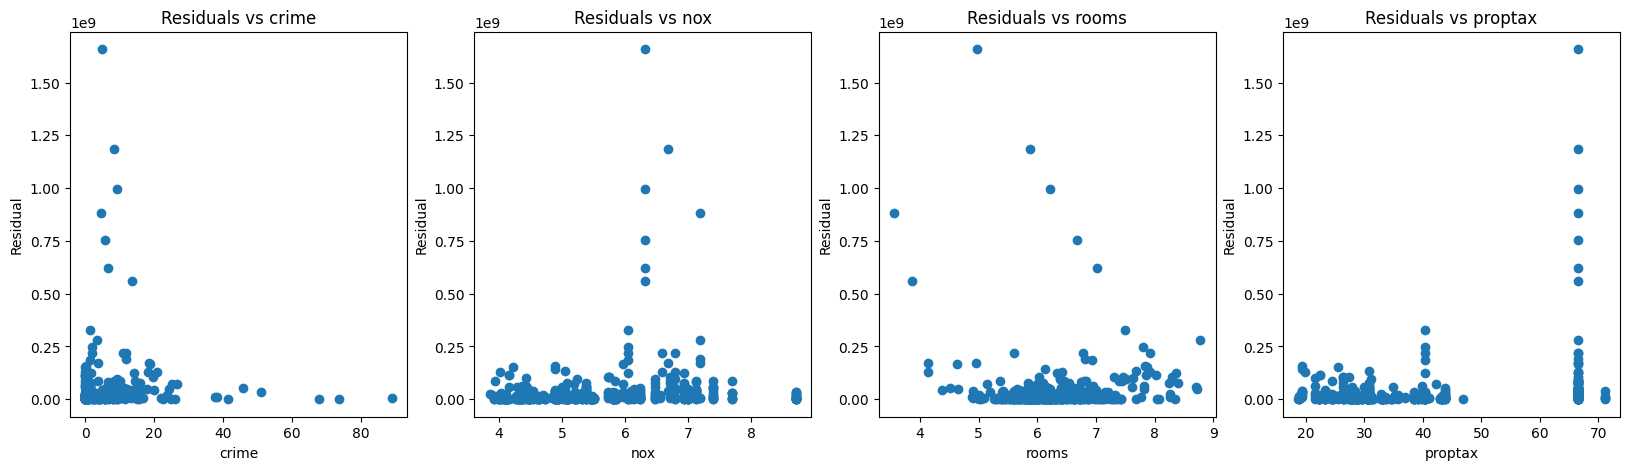

In [73]:
# plot squared residuals vs each column
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
for i, col in enumerate(['crime', 'nox', 'rooms', 'proptax']):
    axs[i].scatter(df[col], residuals_squared19)
    axs[i].set_title('Residuals vs ' + col)
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Residual')

**Conclusion:** The p-value of the F-test is very small, which suggests that we reject the null hypothesis of no heteroskedasticity. This means that the residuals are heteroskedastic, with respect to at least one of the explanatory variables. Our investigation points towards the variable `proptax` as the main source of heteroskedasticity, as seen in the last column plot. While all the plots seem to have outliers, the last one is the most pronounced to the pattern of growing residual variance. This supports our conclusion to reject then null hypothesis of no heteroskedasticity.


### 20. In the specification of question 10, test the hypothesis of no heteroskedasticity of linear form.


In [74]:
X10 = df[['crime', 'nox', 'rooms', 'proptax']]  # Independent variables
X10 = sm.add_constant(X10)  # Add a constant term to the model
y10 = df['lprice']  # Dependent variable
X10.head()

,const,crime,nox,rooms,proptax
0,1.0,0.006,5.38,6.57,29.6
1,1.0,0.027,4.69,6.42,24.2
2,1.0,0.027,4.69,7.18,24.2
3,1.0,0.032,4.58,7.00,22.2
4,1.0,0.069,4.58,7.15,22.2


In [75]:
# Create the model
model10 = sm.OLS(y10, X10).fit()

# Analyze model
print("UNRESTRICTED MODEL")
print(model10.summary())

UNRESTRICTED MODEL
                            OLS Regression Results                            
Dep. Variable:                 lprice   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     196.9
Date:                Sat, 07 Dec 2024   Prob (F-statistic):          2.50e-101
Time:                        13:37:30   Log-Likelihood:                -26.367
No. Observations:                 506   AIC:                             62.73
Df Residuals:                     501   BIC:                             83.87
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.6550      0.137 

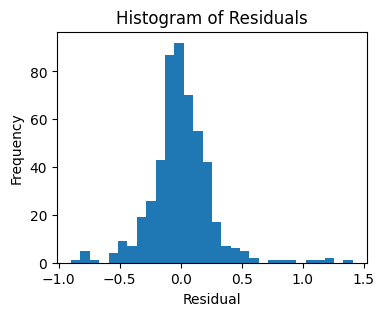

In [76]:
residuals10 = model10.resid

# Plot histogram
plt.figure(figsize=(4, 3))
plt.hist(residuals10, bins=30)
plt.title('Histogram of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()


#### Implementation

In [77]:
# Step 1: Compute squared residuals from the original regression
residuals_squared20 = residuals10 ** 2

# Step 2: Prepare the data for the auxiliary regression
X20 = df[['crime', 'nox', 'rooms', 'proptax']]  # Explanatory variables
X20 = sm.add_constant(X20)  # Add constant term

# Step 3: Run the auxiliary regression
aux_model20 = sm.OLS(residuals_squared20, X20).fit()

# Print the results
print("AUXILIARY REGRESSION")
print(aux_model20.summary())


AUXILIARY REGRESSION
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     17.98
Date:                Sat, 07 Dec 2024   Prob (F-statistic):           8.33e-14
Time:                        13:37:30   Log-Likelihood:                 185.10
No. Observations:                 506   AIC:                            -360.2
Df Residuals:                     501   BIC:                            -339.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0757      0.09


**Conclusion:**  
- The F-statistic is **$17.98$** and the p-value is **$8.33 × 10^{-14}$**. This indicates that the null hypothesis of no heteroskedasticity is rejected at a highly significant level, even more strongly than in the previous case in question 19. Thus, the residuals are heteroskedastic with respect to at least one of the explanatory variables.  
- The p-values of the coefficients have shifted notably compared to question 19. Previously, only `proptax` was significant, but now `rooms` has also become significant with a p-value of **$0.037$**. This is a substantial decrease from its earlier value of **$0.745$**
- This suggests that the variable `rooms`, which previously did not contribute significantly to heteroskedasticity, is now a major source in the model. The transformation to `logprice` appears to have amplified the role of `rooms` while still highlighting the influence of `proptax` as a consistent contributor to heteroskedasticity.


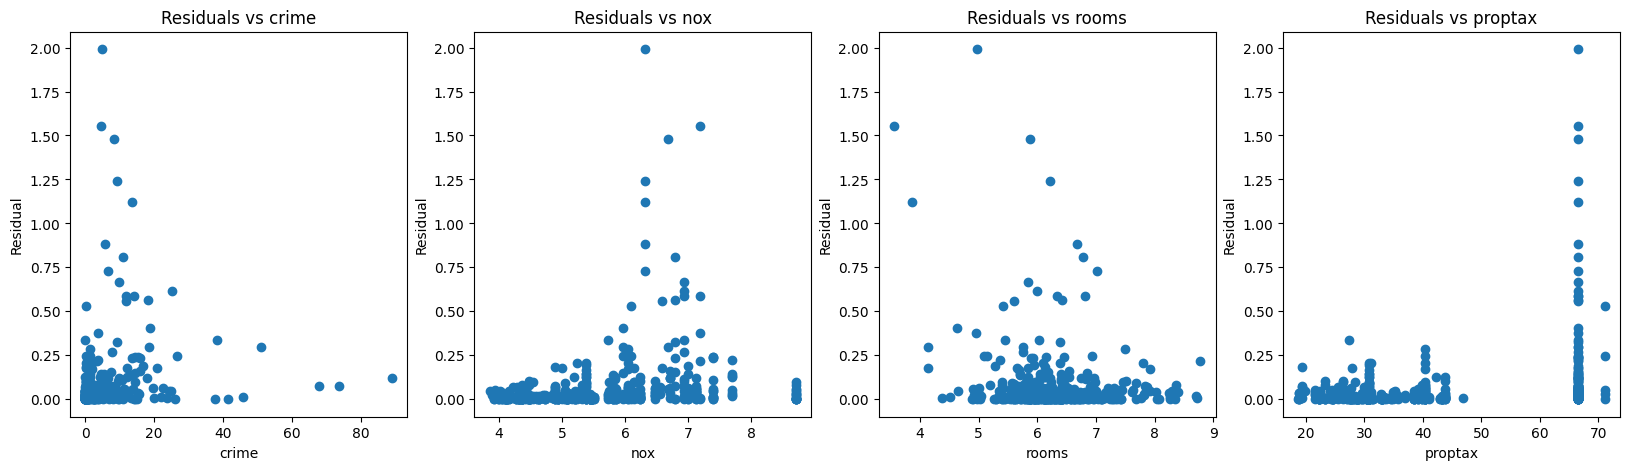

In [78]:
# plot squared residuals vs each column
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
for i, col in enumerate(['crime', 'nox', 'rooms', 'proptax']):
    axs[i].scatter(df[col], residuals_squared20)
    axs[i].set_title('Residuals vs ' + col)
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Residual')
    

### 21. In the specification of question 11, test the hypothesis of no heteroskedasticity of linear form.


In [79]:
X11 = df[['crime', 'lnox', 'rooms', 'lproptax']]  # Independent variables
X11 = sm.add_constant(X11)  # Add a constant term to the model
y11 = df['lprice']  # Dependent variable
X11.head()

,const,crime,lnox,rooms,lproptax
0,1.0,0.006,1.682688,6.57,5.690360
1,1.0,0.027,1.545433,6.42,5.488938
2,1.0,0.027,1.545433,7.18,5.488938
3,1.0,0.032,1.521699,7.00,5.402678
4,1.0,0.069,1.521699,7.15,5.402678


In [80]:
# Create the model
model11 = sm.OLS(y11, X11).fit()

# Analyze model
print(model11.summary())

                            OLS Regression Results                            
Dep. Variable:                 lprice   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     197.4
Date:                Sat, 07 Dec 2024   Prob (F-statistic):          1.77e-101
Time:                        13:37:33   Log-Likelihood:                -26.021
No. Observations:                 506   AIC:                             62.04
Df Residuals:                     501   BIC:                             83.18
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.7505      0.253     38.476      0.0

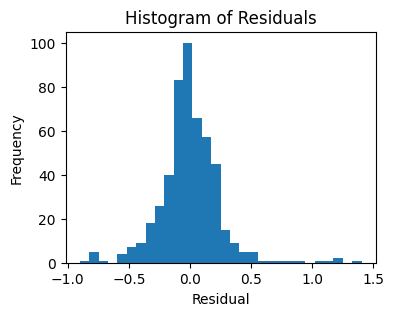

In [81]:
residuals11 = model11.resid

# Plot histogram
plt.figure(figsize=(4, 3))
plt.hist(residuals11, bins=30)
plt.title('Histogram of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()


In [82]:
residuals_squared21 = residuals11 ** 2

X21 = df[['crime', 'lnox', 'rooms', 'lproptax']]  # Explanatory variables
X21 = sm.add_constant(X21)  # Add constant term

aux_model21 = sm.OLS(residuals_squared21, X21).fit()

print("AUXILIARY REGRESSION")
print(aux_model21.summary())


AUXILIARY REGRESSION
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     16.51
Date:                Sat, 07 Dec 2024   Prob (F-statistic):           1.02e-12
Time:                        13:37:34   Log-Likelihood:                 184.66
No. Observations:                 506   AIC:                            -359.3
Df Residuals:                     501   BIC:                            -338.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5496      0.16

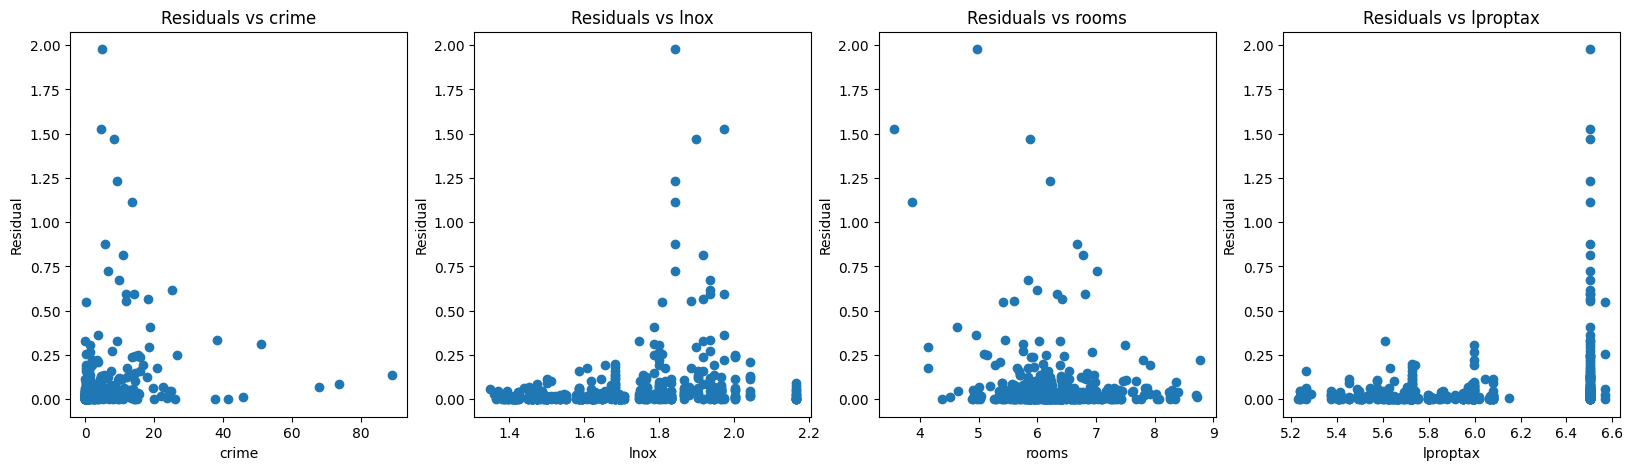

In [83]:
# plot squared residuals vs each column
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

for i, col in enumerate(['crime', 'lnox', 'rooms', 'lproptax']):

    axs[i].scatter(df[col], residuals_squared21)
    axs[i].set_title('Residuals vs ' + col)
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Residual')


### 22. Comment on the differences between your results for questions 19, 20, and 21.


#### **Comparison Between the Three Tests**

##### **1. R-squared and Model Fit**
| Test                     | \( R^2 \) | AIC       | BIC       |
|--------------------------|----------|-----------|-----------|
| Test 19 (`price`)         | 0.051    | 20270     | 20290     |
| Test 20 (`logprice`)      | 0.126    | -360.2    | -339.1    |
| Test 21 (`logprice`, `lnox`, `lproptax`) | 0.116    | -359.3    | -338.2    |

- The second test (`logprice`) has the highest \( R^2 \) and the best AIC/BIC values, suggesting it captures heteroskedasticity better than the other two models.
- Adding log transformations for `nox` and `proptax` in the third test does not improve the model’s ability to explain residual variance.

##### **2. Coefficients and Predictor Significance**
| Variable    | Test 19 (`price`) | Test 20 (`logprice`) | Test 21 (`logprice`, `lnox`, `lproptax`) |
|-------------|------------------|---------------------|-----------------------------------------|
| `proptax`   | Significant (\( p < 0.001 \)) | Significant (\( p < 0.001 \)) | Significant (\( p < 0.001 \)) |
| `rooms`     | Insignificant (\( p = 0.745 \)) | Significant (\( p = 0.037 \)) | Marginally significant (\( p = 0.054 \)) |
| `crime`     | Insignificant (\( p = 0.208 \)) | Insignificant (\( p = 0.972 \)) | Insignificant (\( p = 0.564 \)) |
| `nox/lnox`  | Insignificant (\( p = 0.885 \)) | Insignificant (\( p = 0.986 \)) | Insignificant (\( p = 0.427 \)) |

- `proptax` consistently contributes to heteroskedasticity in all three tests.
- `rooms` emerges as a significant or marginally significant contributor in the second and third tests, indicating its role becomes more apparent when the dependent variable is transformed.
- `crime` and `nox` (or `lnox`) do not significantly affect heteroskedasticity in any test.

##### **3. Interpretation of Log Transformations**
- **Log transformation of the dependent variable (`logprice`)**:
  - Improves the model fit and helps explain heteroskedasticity better than using `price` directly.
- **Log transformation of predictors (`lnox`, `lproptax`)**:
  - Does not significantly improve the model compared to using the untransformed predictors.


#### **Conclusion**
1. **Best Model**:
   - Test 20, using `logprice` as the dependent variable without log-transforming the predictors, is the best model for explaining heteroskedasticity. It has the highest \( R^2 \), lowest AIC/BIC, and captures the roles of `proptax` and `rooms` effectively.

2. **Predictor Contributions**:
   - `proptax` is the strongest and most consistent contributor to heteroskedasticity across all tests.
   - `rooms` plays a secondary role, becoming significant only when `logprice` is used.

3. **Transformations**:
   - Log transformation of the dependent variable (`logprice`) is impactful and should be preferred. Transforming predictors (`lnox`, `lproptax`) does not provide additional benefits.


### 23. Using the specification of question 9, identify the most significant variable causing heteroskedasticity using the student statistics, and run a Weighted Least Squares (WLS) regression with the identified variable as the weight. Compare the standard errors with those of question 9. Comment on your results.


In [84]:

# Step 1: Use proptax as the weight
weights = 1 / df['proptax']  # or 1 / (df['proptax'] ** 2)

# Step 2: Prepare the data for WLS regression
X_wls = sm.add_constant(df[['crime', 'nox', 'rooms', 'proptax']])
y_wls = df['price']

# Step 3: Perform WLS regression
wls_model = sm.WLS(y_wls, X_wls, weights=weights).fit()

# Step 4: Compare with OLS results
ols_model = sm.OLS(y_wls, X_wls).fit()


In [85]:

# Step 5: Print summaries
print("WLS Regression Results:")
print(wls_model.summary())

print("\nOLS Regression Results")
print(ols_model.summary())


WLS Regression Results:
                            WLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.675
Model:                            WLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     260.6
Date:                Sat, 07 Dec 2024   Prob (F-statistic):          6.53e-121
Time:                        13:37:36   Log-Likelihood:                -5063.3
No. Observations:                 506   AIC:                         1.014e+04
Df Residuals:                     501   BIC:                         1.016e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -2.99e+04   2820

In [86]:

# Extract and compare standard errors
comparison_df = pd.DataFrame({
    'Variable': X_wls.columns,
    'OLS Std Errors': ols_model.bse,
    'WLS Std Errors': wls_model.bse
})
print("\nComparison of Standard Errors:")
print(comparison_df)



Comparison of Standard Errors:
        Variable  OLS Std Errors  WLS Std Errors
const      const     3215.204520     2820.558498
crime      crime       38.528570       44.804955
nox          nox      314.633813      279.170215
rooms      rooms      404.345434      348.497559
proptax  proptax       23.965587       23.380653


#### **Answer**

##### **1. Model Fit**
| Metric               | OLS            | WLS            |
|----------------------|----------------|----------------|
| \( R^2 \)           | 0.575          | 0.675          |
| Adjusted \( R^2 \)  | 0.572          | 0.673          |


- **Improvement in Fit**:
  - The \( R^2 \) and Adjusted \( R^2 \) are higher for WLS, indicating that the model explains more variance in the dependent variable (`price`) after accounting for heteroskedasticity.


##### **2. Coefficient Estimates and Standard Errors**
| Variable  | OLS Coefficient | OLS Std Error | WLS Coefficient | WLS Std Error |
|-----------|-----------------|---------------|-----------------|---------------|
| const     | -18680          | 3215.205      | -29900          | 2820.558      |
| crime     | -136.54         | 38.529        | -111.93         | 44.805        |
| nox       | -660.47         | 314.634       | -332.25         | 279.170       |
| rooms     | 7797.93         | 404.345       | 9360.03         | 348.498       |
| proptax   | -89.41          | 23.966        | -101.88         | 23.381        |

- **Changes in Coefficients**:
  - The coefficients for all variables are generally consistent between OLS and WLS, confirming that the WLS correction does not distort the underlying relationships.
  - The largest absolute change is in the `rooms` coefficient, which increases from 7797.93 to 9360.03 under WLS.

- **Changes in Standard Errors**:
  - The standard errors for most predictors, such as `rooms` and `proptax`, are slightly smaller under WLS, indicating improved precision.
  - However, the standard error for `crime` increases, likely due to the weighting effect.


##### **3. Significance of Predictors**
| Variable  | OLS P-value | WLS P-value |
|-----------|-------------------|-------------------|
| const     | 0.000             | 0.000             |
| crime     | 0.000             | 0.013             |
| nox       | 0.036             | 0.235             |
| rooms     | 0.000             | 0.000             |
| proptax   | 0.000             | 0.000             |

- **Changes in Significance**:
  - `nox` becomes insignificant under WLS ( p = 0.235 ), suggesting that its effect may be less reliable after accounting for heteroskedasticity.
  - `rooms` and `proptax` remain highly significant under both models, with their significance levels unaffected.




#### **Conclusion**

1. **WLS Effectiveness**:
   - WLS provides a better fit to the data, as evidenced by the higher \( R^2 \) value.
   - The weighting stabilizes the variance of residuals, improving the precision of most standard errors (e.g., `rooms` and `proptax`).

2. **Variable Significance**:
   - `proptax` and `rooms` consistently emerge as significant predictors in both OLS and WLS models.
   - The insignificance of `nox` under WLS suggests that its role in explaining house prices is less robust after accounting for heteroskedasticity.

3. **Recommendation**:
   - WLS should be preferred for inference in this model, as it addresses heteroskedasticity effectively, leading to more reliable standard errors and coefficient estimates.
